In [1]:
import utils
from attack import SciPyAttack

import numpy as np
import tensorflow as tf

In [3]:
model = utils.train_nn_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7639 - loss: 0.7573 - val_accuracy: 0.9787 - val_loss: 0.0799
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9649 - loss: 0.1195 - val_accuracy: 0.9847 - val_loss: 0.0571
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9745 - loss: 0.0820 - val_accuracy: 0.9878 - val_loss: 0.0463


In [4]:
x_train, x_test, y_train, y_test = utils.load_mnist_data()

inputs = [
    x_test[3],  # 0
    x_test[2],  # 1
    x_test[1],  # 2
    x_test[18], # 3
    x_test[4],  # 4
    x_test[8],  # 5*, mejor 15?
    x_test[11], # 6
    x_test[0],  # 7
    x_test[61], # 8
    x_test[7],  # 9, mejor 16?
]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
scipyattacker = SciPyAttack(model, distance='L2')

In [ ]:
# Initial guess for the method
x0 = np.random.rand(784)

# For each input
for input_class, input in enumerate(inputs):
    
    # Initial guess for the method
    # x0 = np.clip(input.flatten() + 0.1*np.random.rand(784), 0., 1.)

    # For each target
    for target in range(10):
        if input_class != target:
            print(f"{utils.TextColors.OKGREEN}Attacking from {input_class} to {target}.{utils.TextColors.ENDC}")
            scipyattacker.attack(input=input.flatten(), 
                                 input_class=input_class, 
                                 target=target, 
                                 method='L-BFGS-B',
                                 x0=x0,
                                 maxiters_binary=10,
                                 maxiters_scipy=10000,
                                 right=2.)
            scipyattacker.save(path='out-BFGS-L1')
    print("")

In [ ]:
# For each input
for input_class, input in enumerate(inputs):    
    utils.vis_flat_mnist(input.flatten(), 
                        save=True, 
                        filename=f'out-BFGS-L1/{input_class}-to-{input_class}.png', 
                        format='png')

In [ ]:
utils.big_graph('out-BFGS-L1')

## Prueba individual (para verificar que todo funciona)

In [6]:
input_class = 0
input = inputs[input_class]
target = 1
x0 = np.random.rand(784)

In [7]:
scipyattacker.attack(input=input.flatten(), 
                    input_class=input_class, 
                    target=target, 
                    x0=x0,
                    method='L-BFGS-B',
                    maxiters_binary=10,
                    right=2.)

Performing binary search. c:0.41, iter: 9


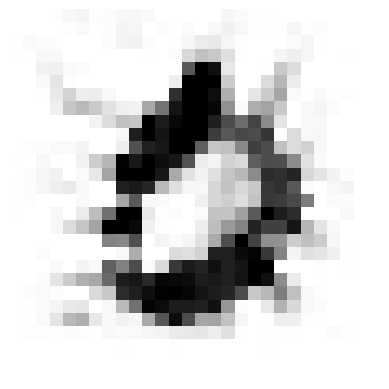

In [8]:
scipyattacker.save("tmp", True)